# More on POS (Parts of Speech)

In [50]:
import nltk
from collections import Counter
import pandas as pd

In [11]:
moonstone = open('../Readings/content/texts/moonstone.md').read()
moonstoneTokens = nltk.word_tokenize(moonstone.lower())
moonstoneTagged = nltk.pos_tag(moonstoneTokens)

## Looking for a pattern

"the other ____" 

             ^- Want this to be a noun 
             
"the other [NN]"

In [12]:
word, tag = ('cousin', 'NN')

In [13]:
tag

'NN'

In [14]:
l = ['a', 'b', 'c']
list(enumerate(l))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [15]:
theOthers = []
for i, wordTagPair in enumerate(moonstoneTagged): 
    if i == len(moonstoneTagged) - 3: 
        break 
    word, tag = wordTagPair
    nextWord, nextTag = moonstoneTagged[i+1] 
    nextNextWord, nextNextTag = moonstoneTagged[i+2]
    if word == "the": 
        if nextWord == "most": 
            if nextNextTag == 'JJ': 
                theOthers.append([word, nextWord, nextNextWord])

In [16]:
Counter([' '.join(words) for words in theOthers]).most_common(50)

[('the most exasperating', 2),
 ('the most unendurable', 2),
 ('the most atrocious', 1),
 ('the most elegant', 1),
 ('the most horrible', 1),
 ('the most slovenly', 1),
 ('the most monstrous', 1),
 ('the most charming', 1),
 ('the most accomplished', 1),
 ('the most inveterate', 1),
 ('the most unfortunate', 1),
 ('the most polite', 1),
 ('the most customary', 1),
 ('the most comforting', 1),
 ('the most melancholy', 1),
 ('the most entire', 1),
 ('the most painful', 1),
 ('the most composing', 1),
 ('the most truly', 1),
 ('the most ungovernable', 1),
 ('the most prominent', 1),
 ('the most amusing', 1),
 ('the most awful', 1),
 ('the most rigid', 1),
 ('the most priceless', 1),
 ('the most unruffled', 1),
 ('the most poorly-gifted', 1),
 ('the most unfaltering', 1),
 ('the most affectionate', 1),
 ('the most pardonable', 1),
 ('the most contemptible', 1),
 ('the most odious', 1),
 ('the most un-english', 1),
 ('the most dreary', 1),
 ('the most profitless', 1),
 ('the most difficult'

In [17]:
moonstoneParts = moonstone.split('\n## ')

In [18]:
moonstoneParts[1].find('First Period')

11955

In [19]:
betteredge = moonstoneParts[1][11955:]

In [22]:
[part[:150] for part in moonstoneParts[3:]] 

['First Narrative\n\nContributed by MISS CLACK; niece of the late SIR JOHN VERINDER\n\n### Chapter I\n\nI am indebted to my dear parents (both now in heaven) ',
 'Second Narrative\n\nContributed by MATHEW BRUFF, Solicitor, of Gray’s Inn Square\n\n### Chapter I\n\nMy fair friend, Miss Clack, having laid down the pen, t',
 'Third Narrative\n\nContributed by FRANKLIN BLAKE\n\n### Chapter I\n\nIn the spring of the year eighteen hundred and forty-nine I was\nwandering in the East, ',
 'Fourth Narrative\n\nExtracted from the Journal of EZRA JENNINGS\n\n1849.–June 15…. With some interruption from patients, and some\ninterruption from pain, ',
 'Fifth Narrative\n\nThe Story Resumed by FRANKLIN BLAKE\n\n### Chapter I\n\nBut few words are needed, on my part, to complete the narrative that has\nbeen pre',
 'Sixth Narrative\n\nContributed by SERGEANT CUFF\n\n### Chapter I\n\nDorking, Surrey, July 30th, 1849. To Franklin Blake, Esq. Sir,–I beg to\napologise for th',
 'Seventh Narrative\n\nIn a Lett

In [23]:
narrators = ['clack', 'bruff', 'blake', 'jennings', 'blake2', 'cuff', 'candy', 'betteredege2', 'epilogue'] 

In [24]:
narratorDict = {narrator: text for narrator, text in zip(narrators, moonstoneParts[3:])}

In [40]:
narratorDict['betteredge'] = betteredge

In [37]:
def findPattern(wordList, text):
    word1, word2, tag3 = wordList
    theOthers = []
    for i, wordTagPair in enumerate(text): 
        if i == len(text) - 3: 
            break 
        word, tag = wordTagPair
        nextWord, nextTag = text[i+1] 
        nextNextWord, nextNextTag = text[i+2]
        if word == word1: 
            if nextWord == word2: 
                if nextNextTag == tag3: 
                    theOthers.append([word, nextWord, nextNextWord])
    return theOthers

In [42]:
superlativesDict = {}
for narr in narratorDict: 
    text = narratorDict[narr]
    taggedText = nltk.pos_tag(nltk.word_tokenize(text))
    pats = findPattern(['the', 'most', 'JJ'], taggedText)
    superlativesDict[narr] = pats

In [46]:
for item in superlativesDict.items():
    print(item)

('clack', [['the', 'most', 'truly'], ['the', 'most', 'ungovernable'], ['the', 'most', 'prominent'], ['the', 'most', 'amusing'], ['the', 'most', 'awful'], ['the', 'most', 'rigid'], ['the', 'most', 'priceless'], ['the', 'most', 'unruffled'], ['the', 'most', 'poorly-gifted'], ['the', 'most', 'unfaltering'], ['the', 'most', 'affectionate'], ['the', 'most', 'exasperating'], ['the', 'most', 'pardonable']])
('bruff', [['the', 'most', 'contemptible'], ['the', 'most', 'odious'], ['the', 'most', 'un-English'], ['the', 'most', 'dreary'], ['the', 'most', 'profitless'], ['the', 'most', 'difficult']])
('blake', [['the', 'most', 'positive'], ['the', 'most', 'indistinct'], ['the', 'most', 'adorable'], ['the', 'most', 'beautiful'], ['the', 'most', 'extraordinary'], ['the', 'most', 'remarkable-looking'], ['the', 'most', 'discouraging']])
('jennings', [['the', 'most', 'important']])
('blake2', [['the', 'most', 'disgraceful']])
('cuff', [])
('candy', [])
('betteredege2', [])
('epilogue', [['the', 'most', 

In [48]:
superlativeCounts = {narr: len(pats) for narr, pats in superlativesDict.items()}

In [52]:
narratorLens = {narr: len(text) for narr, text in narratorDict.items()}

In [55]:
lengthsSeries = pd.Series(narratorLens)

In [56]:
superlativesSeries = pd.Series(superlativeCounts)

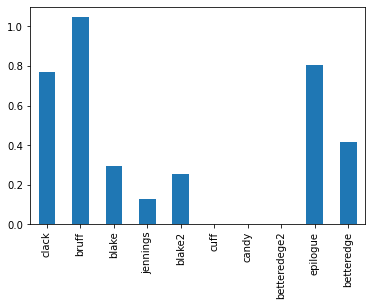

In [61]:
((superlativesSeries / lengthsSeries) * 10000).plot(kind='bar')

In [62]:
def findPattern2(wordList, text):
    tag1, word2, word3 = wordList
    theOthers = []
    for i, wordTagPair in enumerate(text): 
        if i == len(text) - 3: 
            break 
        word, tag = wordTagPair
        nextWord, nextTag = text[i+1] 
        nextNextWord, nextNextTag = text[i+2]
        if tag == tag1: 
            if nextWord == word2: 
                if nextNextWord == word3: 
                    theOthers.append([word, nextWord, nextNextWord])
    return theOthers

In [68]:
findPattern2(['VVD', 'the', 'diamond'], moonstoneTagged)

[]

## Corpora

A corpus is just a collection of text. Corpora are collections of text. 

In [70]:
dir(nltk.corpus)

['AlignedCorpusReader',
 'AlpinoCorpusReader',
 'BNCCorpusReader',
 'BracketParseCorpusReader',
 'CHILDESCorpusReader',
 'CMUDictCorpusReader',
 'CategorizedBracketParseCorpusReader',
 'CategorizedCorpusReader',
 'CategorizedPlaintextCorpusReader',
 'CategorizedSentencesCorpusReader',
 'CategorizedTaggedCorpusReader',
 'ChasenCorpusReader',
 'ChunkedCorpusReader',
 'ComparativeSentencesCorpusReader',
 'ConllChunkCorpusReader',
 'ConllCorpusReader',
 'CorpusReader',
 'CrubadanCorpusReader',
 'DependencyCorpusReader',
 'EuroparlCorpusReader',
 'FramenetCorpusReader',
 'IEERCorpusReader',
 'IPIPANCorpusReader',
 'IndianCorpusReader',
 'KNBCorpusReader',
 'LazyCorpusLoader',
 'LinThesaurusCorpusReader',
 'MTECorpusReader',
 'MWAPPDBCorpusReader',
 'MacMorphoCorpusReader',
 'NKJPCorpusReader',
 'NPSChatCorpusReader',
 'NombankCorpusReader',
 'NonbreakingPrefixesCorpusReader',
 'OpinionLexiconCorpusReader',
 'PPAttachmentCorpusReader',
 'PanLexLiteCorpusReader',
 'PanlexSwadeshCorpusReader',

## The Brown Corpus

In [71]:
from nltk.corpus import brown

In [76]:
# brown.raw(categories=['fiction'])

In [78]:
fiction = brown.words(categories=['fiction'])

In [80]:
len(fiction)

68488

In [81]:
categories = brown.categories()

In [82]:
categoriesDict = {}
for category in categories: 
    words = brown.words(categories=[category])
    categoriesDict[category] = words

In [83]:
categoriesDiction = {category: brown.words(categories=[category]) for category in categories }

In [84]:
categoriesDict

{'adventure': ['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...],
 'belles_lettres': ['Northern', 'liberals', 'are', 'the', 'chief', ...],
 'editorial': ['Assembly', 'session', 'brought', 'much', 'good', ...],
 'fiction': ['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', ...],
 'government': ['The', 'Office', 'of', 'Business', 'Economics', '(', ...],
 'hobbies': ['Too', 'often', 'a', 'beginning', 'bodybuilder', ...],
 'humor': ['It', 'was', 'among', 'these', 'that', 'Hinkle', ...],
 'learned': ['1', '.', 'Introduction', 'It', 'has', 'recently', ...],
 'lore': ['In', 'American', 'romance', ',', 'almost', 'nothing', ...],
 'mystery': ['There', 'were', 'thirty-eight', 'patients', 'on', ...],
 'news': ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...],
 'religion': ['As', 'a', 'result', ',', 'although', 'we', 'still', ...],
 'reviews': ['It', 'is', 'not', 'news', 'that', 'Nathan', ...],
 'romance': ['They', 'neither', 'liked', 'nor', 'disliked', 'the', ...],
 'science_fic

In [86]:
['the', 'the', 'the', 'the', 'the', 'thats', 'all', 'folks'].count('the')

5

In [105]:
americanCounts = pd.Series({category: words.count('love') for category, words in categoriesDict.items()})

In [106]:
wordCounts = pd.Series({category: len(words) for category, words in categoriesDict.items()})

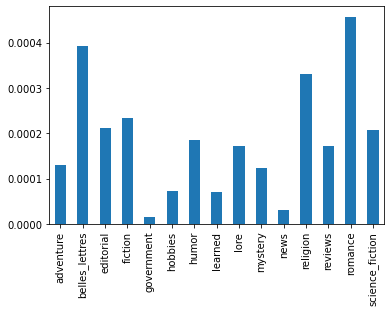

In [107]:
(americanCounts / wordCounts).plot(kind='bar')

In [118]:
catCounters = pd.DataFrame({cat: Counter(words) for cat, words in categoriesDict.items()})

In [121]:
catProportions = catCounters / wordCounts

In [125]:
catProportions['average'] = catProportions.mean(axis=1)

In [130]:
(catProportions['science_fiction'] - catProportions['average']).sort_values(ascending=False).head(30)

.         0.010141
''        0.007175
``        0.007127
?         0.005769
had       0.004699
was       0.004572
,         0.003330
he        0.003321
would     0.002905
it        0.002659
not       0.002580
you       0.002477
her       0.001996
could     0.001822
all       0.001518
them      0.001512
did       0.001455
him       0.001435
I         0.001429
no        0.001391
!         0.001362
were      0.001256
ship      0.001235
;         0.001219
Hal       0.001180
they      0.001160
Mercer    0.001109
but       0.001063
Mike      0.001044
Jack      0.001043
dtype: float64